### Importing Libraries and dataset

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

<b>Loading the insurance data</b>

In [2]:
df = pd.read_csv(r'/Users/karthickdurai/Projects/physionet/datasets/insurance/insurance.csv')

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### UNIVARIATE STATS

<b>Demonstrate basic distribution</b>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<b>Find no of missing values</b>

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [7]:
df.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

<Axes: >

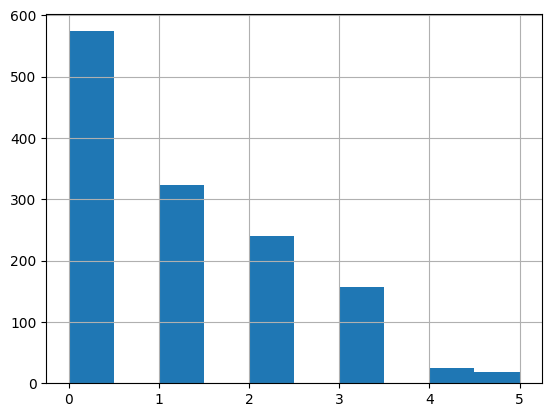

In [8]:
df.children.hist()

<b>Abnormality and spreadness analysis</b>

<Axes: >

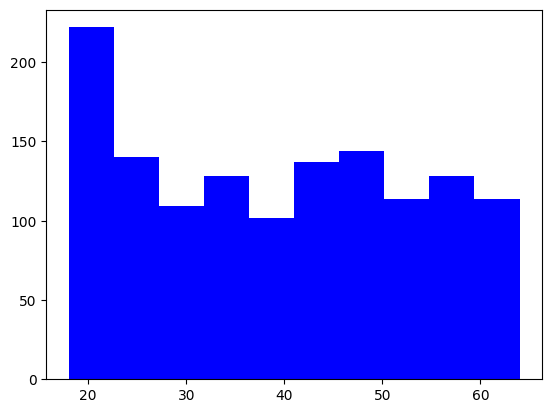

In [7]:
df.age.hist(color='blue', grid=False)

Lets look at KDE

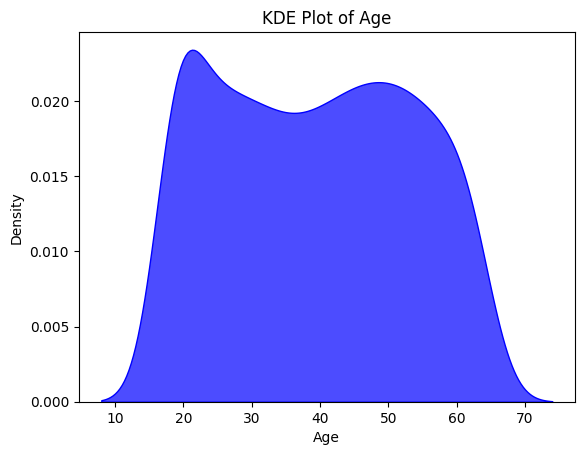

In [20]:
sns.kdeplot(df.age, fill=True, color='blue', alpha=0.7)

plt.xlabel('Age')
plt.ylabel('Density')
plt.title('KDE Plot of Age')

plt.show()

<b> calculate variance and std deviation

In [9]:
# Find out the variance and std dev for all numeric cols

### BIVARIATE STATS

In [21]:
df.corr()

/var/folders/99/4yq6shcx5xsdwmskwf1nmb600000gn/T/ipykernel_44813/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [25]:
df.corr().charges

/var/folders/99/4yq6shcx5xsdwmskwf1nmb600000gn/T/ipykernel_44813/1121141159.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().charges


age         0.299008
bmi         0.198341
children    0.067998
charges     1.000000
Name: charges, dtype: float64

<b> Using Pearson correlation </b>

In [28]:
r, p = stats.pearsonr(df.charges, df.bmi)

In [29]:
r, p

(0.19834096883362926, 2.45908553511648e-13)

In [10]:
df.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

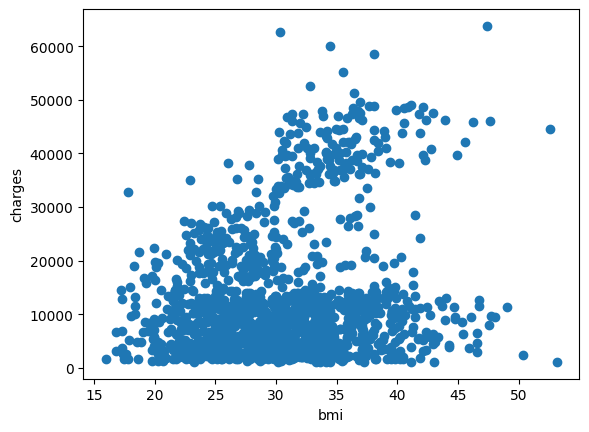

In [11]:
plt.scatter(df.bmi, df.charges)

plt.xlabel('bmi')
plt.ylabel('charges')
plt.show()

In [24]:
df_sampled = df.sample(2)

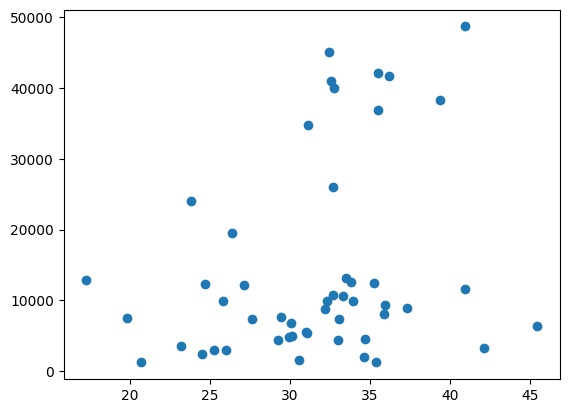

In [21]:
plt.scatter(df_sampled.bmi, df_sampled.charges)

In [35]:
df_smoker = df[df['smoker']== 'yes']
df_nonsmoker = df[df['smoker']== 'no']

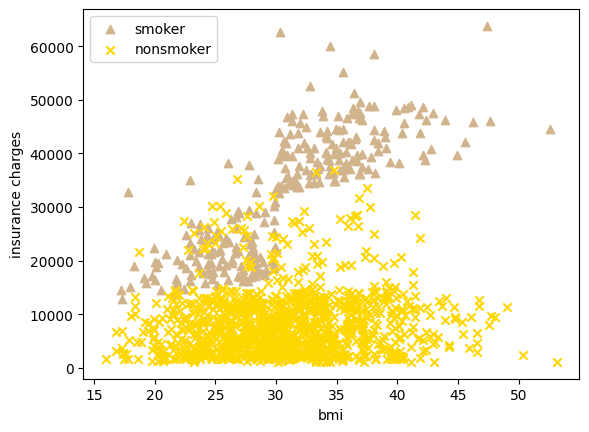

In [53]:
plt.scatter(df_smoker.bmi, df_smoker.charges, marker='^', color='tan', label='smoker')
plt.scatter(df_nonsmoker.bmi, df_nonsmoker.charges, marker='x', color='gold', label='nonsmoker')

plt.legend()
plt.xlabel('bmi')
plt.ylabel('insurance charges')
plt.show()


<b> Ideal Line Fit </b> <br><br>Lets try to fit a line through this graph

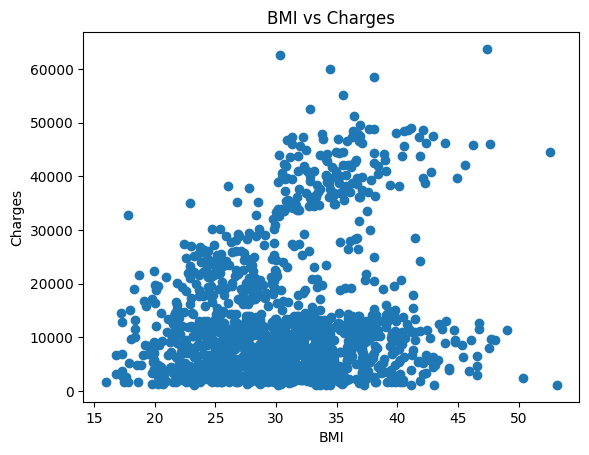

In [55]:
plt.scatter(df.bmi, df.charges)

plt.title('BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

In [56]:
stats.linregress(df.bmi, df.charges)

LinregressResult(slope=393.8730307973952, intercept=1192.9372089611516, rvalue=0.1983409688336289, pvalue=2.459085535116683e-13, stderr=53.25073835210321, intercept_stderr=1664.8023845286948)

<b> lets actually plot that line </b>

In [58]:
x = range(df.age.min(), df.age.max())

In [59]:
df.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

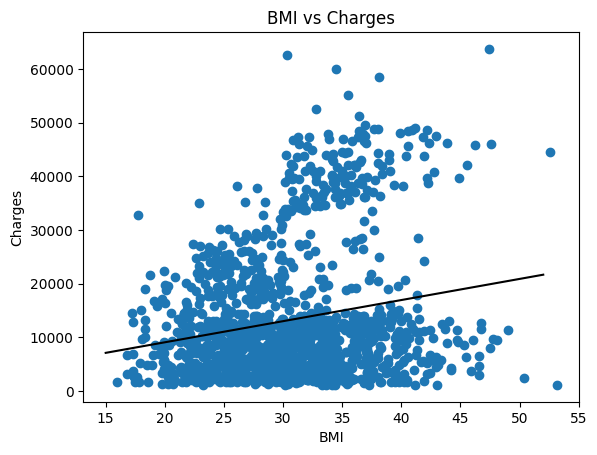

In [63]:
m, b, r, p, err = stats.linregress(df.bmi, df.charges)

x = range(15, 53)
y = m * x + b

plt.plot(x, y, color='black')
plt.scatter(df.bmi, df.charges)

plt.title('BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

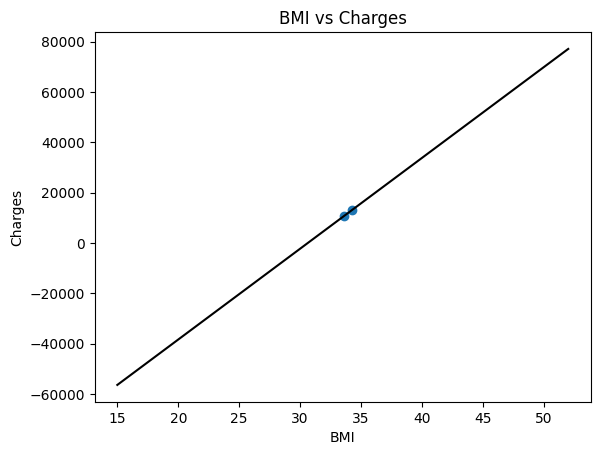

In [25]:
m, b, r, p, err = stats.linregress(df_sampled.bmi, df_sampled.charges)

x = range(15, 53)
y = m * x + b

plt.plot(x, y, color='black')
plt.scatter(df_sampled.bmi, df_sampled.charges)

plt.title('BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()